In [1]:
import numba
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import IPython
import IPython.display

2023-02-13 16:01:51.101144: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 16:01:52.894111: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda-11.7/lib64:
2023-02-13 16:01:52.898973: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda-11.7/lib64:
2023-02-13 16:01:52.898994: W tensorflow/compiler/tf2tensorrt/utils/py_utils.c

## Récupération des données

In [2]:
columns = ["Date", "Heure", "SG Hauteur", "SG Ectype", "SG Q", "SN Hauteur", "SN Ectype", "SN Q",
          "Montoir Hauteur", "Montoir Ectype", "Montoir Q", "Paimboeuf Hauteur", "Paimboeuf Ectype", "Paimboeuf Q",
          "Cordemais Hauteur", "Cordemais Ectype", "Cordemais Q", "LP Hauteur", "LP Ectype", "LP Q",
          "NUB Hauteur", "NUB Ectype", "NUB Q", "NSAL Hauteur", "NSAL Ectype", "NSAL Q", "SG Patm", "Nantes Patm"]

chunks = pd.read_csv("Datas/X_tides.csv", index_col=0, chunksize = 1e6, iterator = True, low_memory = False)
X = pd.DataFrame()
for chunk in chunks:
    X = pd.concat((X,chunk))
X

,Date,SG Hauteur,SG Ectype,SG Q,SN Hauteur,SN Ectype,SN Q,Montoir Hauteur,Montoir Ectype,Montoir Q,...,LP Ectype,LP Q,NUB Hauteur,NUB Ectype,NUB Q,NSAL Hauteur,NSAL Ectype,NSAL Q,SG Patm,Nantes Patm
0,2012-01-01 00:00:00,3.88,0.8,1,3.96,0.5,1,4.08,0.4,1,...,0.5,1,4.53,0.4,1,4.68,0.6,1,1017.9,1018.8
1,2012-01-01 00:05:00,3.85,0.4,1,3.94,0.7,1,4.07,0.4,1,...,0.5,1,4.50,0.4,1,4.64,0.4,1,1017.4,1018.2
2,2012-01-01 00:10:00,3.83,0.6,1,3.93,1.1,1,4.05,0.0,1,...,0.6,1,4.47,0.5,1,4.61,0.4,1,1018.1,1018.4
3,2012-01-01 00:15:00,3.80,0.7,1,3.91,1.7,1,4.03,0.0,1,...,0.6,1,4.44,0.3,1,4.57,0.4,1,1017.4,1019.0
4,2012-01-01 00:20:00,3.78,0.5,1,3.89,1.4,1,4.02,0.0,1,...,0.3,1,4.40,0.4,1,4.54,0.4,1,1017.6,1019.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52616,2012-12-30 16:55:00,5.22,0.5,1,5.34,1.9,1,5.48,0.0,1,...,0.3,1,5.74,0.3,1,5.77,0.3,1,1022.2,1022.6
52617,2012-12-30 17:00:00,5.27,0.4,1,5.39,2.2,1,5.53,0.4,1,...,0.5,1,5.81,0.5,1,5.85,0.6,1,1021.3,1022.0
52618,2012-12-30 17:05:00,5.30,0.3,1,5.43,2.1,1,5.57,0.4,1,...,0.6,1,5.87,0.5,1,5.92,0.5,1,1022.1,1022.1
52619,2012-12-30 17:10:00,5.34,0.5,1,5.46,1.0,1,5.63,0.0,1,...,0.5,1,5.94,0.3,1,5.99,0.0,1,1021.6,1022.9


In [3]:
chunks = pd.read_csv("Datas/Y_tides.csv", index_col=0, chunksize = 1e6, iterator = True, low_memory = False)
Y = pd.DataFrame()
for chunk in chunks:
    Y = pd.concat((Y,chunk))
Y

,Date,SG Hauteur,SN Hauteur,Montoir Hauteur,Paimboeuf Hauteur,Cordemais Hauteur,LP Hauteur,NUB Hauteur,NSAL Hauteur
0,2012-01-01 00:00:00,3.88,3.96,4.08,4.09,4.06,4.26,4.53,4.68
1,2012-01-01 00:05:00,3.85,3.94,4.07,4.07,4.06,4.23,4.50,4.64
2,2012-01-01 00:10:00,3.83,3.93,4.05,4.06,4.05,4.22,4.47,4.61
3,2012-01-01 00:15:00,3.80,3.91,4.03,4.03,4.04,4.19,4.44,4.57
4,2012-01-01 00:20:00,3.78,3.89,4.02,4.02,4.02,4.18,4.40,4.54
...,...,...,...,...,...,...,...,...,...
52616,2012-12-30 16:55:00,5.22,5.34,5.48,5.56,5.62,5.72,5.74,5.77
52617,2012-12-30 17:00:00,5.27,5.39,5.53,5.60,5.67,5.78,5.81,5.85
52618,2012-12-30 17:05:00,5.30,5.43,5.57,5.66,5.71,5.84,5.87,5.92
52619,2012-12-30 17:10:00,5.34,5.46,5.63,5.70,5.75,5.88,5.94,5.99


In [4]:
X.pop('Date')
Y.pop('Date')
# df = df.drop(["SG Hauteur", "SG Ectype", "SG Q", "SN Ectype", "SN Q",
#           "Montoir Ectype", "Montoir Q", "Paimboeuf Ectype", "Paimboeuf Q",
#           "Cordemais Ectype", "Cordemais Q", "LP Ectype", "LP Q",
#           "NUB Ectype", "NUB Q", "NSAL Ectype", "NSAL Q", "SG Patm", "Nantes Patm"], axis = 1)

# Input features
Nb_features = X.shape[1]
print(f"Number of features : {Nb_features}")

Nb_labels = Y.shape[1]
print(f"Number of Label : {Nb_labels}")

Number of features : 26
Number of Label : 8


### Longueur d'entrée et de sortie

In [7]:
input_length = 12
output_length = 3
batch_size = 512

### Shift function

In [27]:
def transform_to_supervised(df,
                            previous_steps=1, 
                            forecast_steps=1,
                            dropnan=True):

    """
    Transforms a DataFrame containing time series data into a DataFrame
    containing data suitable for use as a supervised learning problem.
    
    Derived from code originally found at 
    https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
    
    :param df: pandas DataFrame object containing columns of time series values
    :param previous_steps: the number of previous steps that will be included in the
                           output DataFrame corresponding to each input column
    :param forecast_steps: the number of forecast steps that will be included in the
                           output DataFrame corresponding to each input column
    :return Pandas DataFrame containing original columns, renamed <orig_name>(t), as well as
            columns for previous steps, <orig_name>(t-1) ... <orig_name>(t-n) and columns 
            for forecast steps, <orig_name>(t+1) ... <orig_name>(t+n)
    """
    
    # original column names
    col_names = df.columns
    
    # list of columns and corresponding names we'll build from 
    # the originals found in the input DataFrame
    cols, names = list(), list()

    # input sequence (t-n, ... t-1)
    for i in range(previous_steps, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (col_name, i)) for col_name in col_names]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, forecast_steps):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('%s(t)' % col_name) for col_name in col_names]
        else:
            names += [('%s(t+%d)' % (col_name, i)) for col_name in col_names]

    # put all the columns together into a single aggregated DataFrame
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

In [28]:
X = transform_to_supervised(X, previous_steps=12, forecast_steps=0)
X

,SG Hauteur(t-12),SG Ectype(t-12),SG Q(t-12),SN Hauteur(t-12),SN Ectype(t-12),SN Q(t-12),Montoir Hauteur(t-12),Montoir Ectype(t-12),Montoir Q(t-12),Paimboeuf Hauteur(t-12),...,LP Ectype(t-1),LP Q(t-1),NUB Hauteur(t-1),NUB Ectype(t-1),NUB Q(t-1),NSAL Hauteur(t-1),NSAL Ectype(t-1),NSAL Q(t-1),SG Patm(t-1),Nantes Patm(t-1)
12,3.88,0.8,1.0,3.96,0.5,1.0,4.08,0.4,1.0,4.09,...,0.5,1.0,4.26,0.4,1.0,4.36,0.4,1.0,1017.6,1018.1
13,3.85,0.4,1.0,3.94,0.7,1.0,4.07,0.4,1.0,4.07,...,0.3,1.0,4.24,0.5,1.0,4.33,0.4,1.0,1016.9,1018.2
14,3.83,0.6,1.0,3.93,1.1,1.0,4.05,0.0,1.0,4.06,...,0.5,1.0,4.22,0.4,1.0,4.32,0.4,1.0,1017.7,1018.6
15,3.80,0.7,1.0,3.91,1.7,1.0,4.03,0.0,1.0,4.03,...,0.5,1.0,4.19,0.4,1.0,4.30,0.0,1.0,1016.4,1018.1
16,3.78,0.5,1.0,3.89,1.4,1.0,4.02,0.0,1.0,4.02,...,0.5,1.0,4.17,0.5,1.0,4.28,0.4,1.0,1017.1,1017.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52616,4.54,0.5,1.0,4.60,1.5,1.0,4.72,0.6,1.0,4.76,...,0.6,1.0,5.67,0.5,1.0,5.69,0.4,1.0,1021.7,1022.3
52617,4.62,1.0,1.0,4.67,2.1,1.0,4.80,0.3,1.0,4.84,...,0.3,1.0,5.74,0.3,1.0,5.77,0.3,1.0,1022.2,1022.6
52618,4.69,0.5,1.0,4.72,1.5,1.0,4.87,0.6,1.0,4.92,...,0.5,1.0,5.81,0.5,1.0,5.85,0.6,1.0,1021.3,1022.0
52619,4.74,0.3,1.0,4.78,1.2,1.0,4.94,0.4,1.0,4.99,...,0.6,1.0,5.87,0.5,1.0,5.92,0.5,1.0,1022.1,1022.1


In [29]:
Y = transform_to_supervised(Y, previous_steps=0, forecast_steps=3)
Y

,SG Hauteur(t),SN Hauteur(t),Montoir Hauteur(t),Paimboeuf Hauteur(t),Cordemais Hauteur(t),LP Hauteur(t),NUB Hauteur(t),NSAL Hauteur(t),SG Hauteur(t+1),SN Hauteur(t+1),...,NUB Hauteur(t+1),NSAL Hauteur(t+1),SG Hauteur(t+2),SN Hauteur(t+2),Montoir Hauteur(t+2),Paimboeuf Hauteur(t+2),Cordemais Hauteur(t+2),LP Hauteur(t+2),NUB Hauteur(t+2),NSAL Hauteur(t+2)
0,3.88,3.96,4.08,4.09,4.06,4.26,4.53,4.68,3.85,3.94,...,4.50,4.64,3.83,3.93,4.05,4.06,4.05,4.22,4.47,4.61
1,3.85,3.94,4.07,4.07,4.06,4.23,4.50,4.64,3.83,3.93,...,4.47,4.61,3.80,3.91,4.03,4.03,4.04,4.19,4.44,4.57
2,3.83,3.93,4.05,4.06,4.05,4.22,4.47,4.61,3.80,3.91,...,4.44,4.57,3.78,3.89,4.02,4.02,4.02,4.18,4.40,4.54
3,3.80,3.91,4.03,4.03,4.04,4.19,4.44,4.57,3.78,3.89,...,4.40,4.54,3.75,3.87,4.00,4.01,4.01,4.16,4.38,4.51
4,3.78,3.89,4.02,4.02,4.02,4.18,4.40,4.54,3.75,3.87,...,4.38,4.51,3.72,3.85,3.98,3.99,3.99,4.15,4.35,4.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,5.14,5.24,5.38,5.46,5.53,5.58,5.59,5.60,5.20,5.29,...,5.67,5.69,5.22,5.34,5.48,5.56,5.62,5.72,5.74,5.77
52615,5.20,5.29,5.43,5.51,5.58,5.65,5.67,5.69,5.22,5.34,...,5.74,5.77,5.27,5.39,5.53,5.60,5.67,5.78,5.81,5.85
52616,5.22,5.34,5.48,5.56,5.62,5.72,5.74,5.77,5.27,5.39,...,5.81,5.85,5.30,5.43,5.57,5.66,5.71,5.84,5.87,5.92
52617,5.27,5.39,5.53,5.60,5.67,5.78,5.81,5.85,5.30,5.43,...,5.87,5.92,5.34,5.46,5.63,5.70,5.75,5.88,5.94,5.99


In [30]:
X = X[:X.shape[0]-output_length+1]
Y = Y[input_length:]
print(X.head)
print(Y.head)

X_datas = X.values
X_datas = X_datas.reshape((X.shape[0], input_length, Nb_features))
Y_datas = Y.values
Y_datas = Y_datas.reshape((Y.shape[0], output_length, Nb_labels))

       SG Hauteur(t-12)  SG Ectype(t-12)  SG Q(t-12)  SN Hauteur(t-12)  \
12                 3.88              0.8         1.0              3.96   
13                 3.85              0.4         1.0              3.94   
14                 3.83              0.6         1.0              3.93   
15                 3.80              0.7         1.0              3.91   
16                 3.78              0.5         1.0              3.89   
...                 ...              ...         ...               ...   
52614              4.42              0.7         1.0              4.43   
52615              4.48              0.4         1.0              4.51   
52616              4.54              0.5         1.0              4.60   
52617              4.62              1.0         1.0              4.67   
52618              4.69              0.5         1.0              4.72   

       SN Ectype(t-12)  SN Q(t-12)  Montoir Hauteur(t-12)  \
12                 0.5         1.0                

In [20]:
n = len(X_datas)
# Train dataset
X_train = X_datas[:int(0.7*n)]
Y_train = Y_datas[:int(0.7*n)]

# Validation dataset
X_val = X_datas[int(0.7*n):int(0.9*n)]
Y_val = Y_datas[int(0.7*n):int(0.9*n)]

# Test dataset
X_test = X_datas[int(0.9*n):]
Y_test = Y_datas[int(0.9*n):]

X_train.shape

(73502, 12, 26)

In [19]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                            __: 250.8 MiB
                            _7: 250.8 MiB
                             X: 250.7 MiB
                            _2: 21.6 MiB
                             _: 20.0 MiB
                            _8: 20.0 MiB
                             Y: 20.0 MiB
                         chunk: 14.8 MiB
                           ___:  7.2 MiB
                            _3:  7.2 MiB


### Fonction de fenetrage

In [5]:
def split(array):
    inputs = array[:,0:input_length, :]    
    inputs.set_shape([None,input_length, None])

    outputs = array[:,input_length:input_length+output_length, :]
    outputs.set_shape([None, output_length, None])
    return inputs, outputs

def split_outputs(array):
    outputs = array[:,input_length:input_length+output_length, :]
    outputs.set_shape([None, output_length, None])
    return outputs

### Création des datasets

In [13]:
#X_train = np.array(X_train, dtype=np.float32)
train_ds = tf.keras.utils.timeseries_dataset_from_array(
  data=Y,
  targets=None,
  sequence_length=output_length+input_length,
  sequence_stride=1,
  shuffle=True,
  batch_size=batch_size)

train_ds = train_ds.map(split)
train_ds




<MapDataset element_spec=(TensorSpec(shape=(None, 12, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3, 8), dtype=tf.float64, name=None))>

In [16]:
X_val = tf.keras.utils.timeseries_dataset_from_array(
  data=X_val,
  targets=None,
  sequence_length=output_length+input_length,
  sequence_stride=1,
  shuffle=True,
  batch_size=batch_size)

Y_val = tf.keras.utils.timeseries_dataset_from_array(
  data=Y_val,
  targets=None,
  sequence_length=output_length+input_length,
  sequence_stride=1,
  shuffle=True,
  batch_size=batch_size)

X_val = X_val.map(split_inputs)
Y_val = Y_val.map(split_outputs)

In [17]:
X_test = tf.keras.utils.timeseries_dataset_from_array(
  data=X_test,
  targets=None,
  sequence_length=output_length+input_length,
  sequence_stride=1,
  shuffle=True,
  batch_size=batch_size)

Y_test = tf.keras.utils.timeseries_dataset_from_array(
  data=Y_test,
  targets=None,
  sequence_length=output_length+input_length,
  sequence_stride=1,
  shuffle=True,
  batch_size=batch_size)

X_test = X_test.map(split_inputs)
Y_test = Y_test.map(split_outputs)

### Création du modèle

In [27]:
multi_conv_model = tf.keras.Sequential([
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(32, activation='relu', kernel_size=(3), input_shape = (input_length, Nb_features)),
    tf.keras.layers.Flatten(),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(output_length*Nb_labels,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([output_length, Nb_labels])
])
multi_conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 10, 32)            2528      
                                                                 
 flatten_1 (Flatten)         (None, 320)               0         
                                                                 
 dense_2 (Dense)             (None, 24)                7704      
                                                                 
 reshape_2 (Reshape)         (None, 3, 8)              0         
                                                                 
Total params: 10,232
Trainable params: 10,232
Non-trainable params: 0
_________________________________________________________________


In [14]:
multi_lstm_model =  tf.keras.Sequential([
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.LSTM(64, activation='tanh', input_shape = (input_length, Nb_labels)),
    tf.keras.layers.Dropout(0.2),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(output_length*Nb_labels, kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([output_length, Nb_labels])
])
multi_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                18688     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                1560      
                                                                 
 reshape_1 (Reshape)         (None, 3, 8)              0         
                                                                 
Total params: 20,248
Trainable params: 20,248
Non-trainable params: 0
_________________________________________________________________


### Compilation

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                patience=2,
                                                mode='min')


multi_lstm_model.compile(loss=tf.losses.MeanSquaredError(),
            optimizer=tf.optimizers.Adam(),
            metrics=[tf.metrics.MeanAbsoluteError()])


### Entrainement

In [16]:
MAX_EPOCHS = 10
history = multi_lstm_model.fit(train_ds, epochs=MAX_EPOCHS, callbacks=[early_stopping])

Epoch 1/10


2023-02-13 16:09:47.073833: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2023-02-13 16:09:47.904855: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fd778018600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-13 16:09:47.907220: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-02-13 16:09:48.123815: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-13 16:09:49.608578: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


206/206 [==============================] - 15s 25ms/step - loss: 210.3035 - mean_absolute_error: 3.7299
Epoch 2/10
206/206 [==============================] - 5s 22ms/step - loss: 159.1732 - mean_absolute_error: 2.8297
Epoch 3/10
206/206 [==============================] - 5s 23ms/step - loss: 123.1512 - mean_absolute_error: 2.5109
Epoch 4/10
206/206 [==============================] - 5s 22ms/step - loss: 96.2264 - mean_absolute_error: 2.2909
Epoch 5/10
206/206 [==============================] - 5s 21ms/step - loss: 75.8318 - mean_absolute_error: 2.1127
Epoch 6/10
206/206 [==============================] - 5s 22ms/step - loss: 60.1149 - mean_absolute_error: 1.9470
Epoch 7/10
206/206 [==============================] - 6s 27ms/step - loss: 47.7380 - mean_absolute_error: 1.8045
Epoch 8/10
206/206 [==============================] - 8s 36ms/step - loss: 39.6601 - mean_absolute_error: 1.6887
Epoch 9/10
206/206 [==============================] - 6s 28ms/step - loss: 34.0847 - mean_absolute_erro

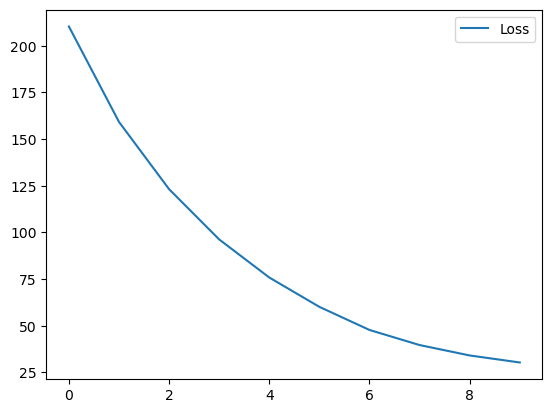

In [17]:
plt.plot(history.history["loss"], label = "Loss")
#plt.plot(history.history["val_loss"], label = "Validation loss")

plt.legend()
plt.show()

In [68]:
multi_lstm_model.save("models/MultiLSTM", save_format="h5")